Note: The scope in this example is just used to display the signals that are generated by the function generator.

In [2]:
# Imports for function generator.
from pverify.drivers.Fgen.hp33120a import IIviFgen
from pverify.drivers.SimplifiedLabInstruments import SimpleFgen

In [13]:
# Intialize and configure the function generator. 
fgen = SimpleFgen(IIviFgen())
fgen.Initialize(ResourceName="GPIB0::10::INSTR", IdQuery=False, Reset=False, OptionString="simulate=False")
fgen.FgenSetup()
fgen_chan = fgen.GetChannel(1)
fgen_chan.Configure_Sine(1.00,1000,0,0)

In [14]:
# Imports for scope.
from pverify.drivers.Scope import TekScope, tkmso5x, tkdpo2k3k4k, tktds1k2k, Aginfiniium
from pverify.drivers.SimplifiedLabInstruments import SimpleScope

In [15]:
# Creating the object 
scope = SimpleScope(TekScope.IIviScope())

In [16]:
# Opens the I/O session to the instrument.
scope.Initialize(ResourceName="USB0::0x0699::0x0451::C020200::INSTR", IdQuery=False, Reset=False, OptionString="simulate=False")

In [17]:
# Setting up TimePerRecord & RecordLength
scope.ScopeSetup(TimePerRecord=0.005, RecordLength=20000)

In [18]:
# Returns a channel object for the probe.
scope_ch_1 = scope.GetChannel(1)

In [19]:
# Enabling the channel.
scope_ch_1.Enable(True)

In [20]:
# Setting up the configuration for the channel.
scope_ch_1.ProbeSetup(Coupling="DC", Vrange=1 ,Bandwidth=200000, Probe_Attn= 10.0)

In [21]:
# Trigging the Waveform on positive or negative going edge.
scope.Trigger_Edge(Level=0 , Slope="rise", Position=50, Coupling="DC", ChannelIndex=1)

In [22]:
# Arms the acquisition of the probe.
scope.Arm()

In [23]:
# Fetching the waveform.
cur_wf = scope_ch_1.GetProbeWaveform(Timeout=1, ForceTriggerOnTimeout=False)

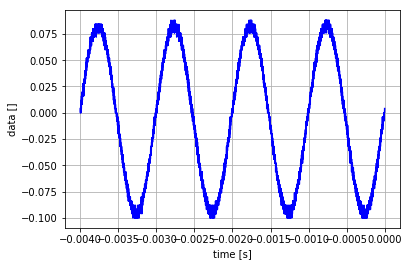

In [24]:
# Plotting the waveform.
cur_wf.plot()

In [25]:
fgen_chan.Configure_Square(50,1,1000,0)

In [27]:
scope.Arm()

In [28]:
# Setting up the configuration for the channel.
scope_ch_1.ProbeSetup(Coupling="DC", Vrange=1 ,Bandwidth=200000, Probe_Attn=10.0)

In [29]:
# Trigging the Waveform exclusively on pulses with a specified range of widths.
scope.Trigger_Width(Level=0, Polarity="POSITIVE", Condition="WITHIN", ThresholdLow=50, ThresholdHigh=100, Position=50, Coupling="DC", ChannelIndex=1)

In [30]:
# Arms the acquisition of the probe.
scope.Arm()

In [18]:
# Fetching the waveform.
cur_wf = scope_ch_1.GetProbeWaveform(Timeout=1, ForceTriggerOnTimeout=False)

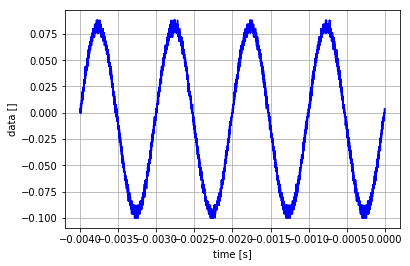

In [19]:
# Plotting the waveform.
cur_wf.plot()

In [20]:
# Measurment to be done.
# Amplitude, Average, RMS, PeakToPeak, Dutycycle, Risetime, 
# Falltime, Frequency, Period, High, Low, Maximum, Minimum, 
# Overshoot,Preshoot,WidthPos, WidthNeg, BurstWidth (YK only), 
# DeltaT (YK only), EdgeCount (YK only), PulseCount (YK only), 
# AvgFreq (YK only), AvgPeriod (YK only),
scope_ch_1.GetProbeMeasurement("Minimum")

-0.1

In [21]:
scope_ch_1.GetProbeMeasurement("PEAKTOPEAK")

0.188

In [22]:
scope_ch_1.GetProbeMeasurement("FREQUENCY")

1002.8

In [23]:
# Closes the I/O session to the instrument.
scope.Close()
fgen.Close()